## spaCy Course Ch 1: Finding words, phrases, names and concepts

This chapter will introduce you to the basics of text processing with spaCy. You'll learn about the data structures, how to work with statistical models, and how to use them to predict linguistic features in your text.

https://course.spacy.io/en/chapter1

1. Introduction to spaCy

In [1]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

- contains the processing pipeline
- includes language-specific rules for tokenization etc.

2. Getting Started

In [2]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


In [3]:
# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

¿Cómo estás?


3. Documents, spans and tokens

When you call nlp on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you’ll learn more about the Doc, as well as its views Token and Span.

Step 1
- Import the English language class and create the nlp object.
- Process the text and instantiate a Doc object in the variable doc.
- Select the first token of the Doc and print its text.

In [4]:
# Import the English language class and create the nlp object
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


Step 2
- Import the English language class and create the nlp object.
- Process the text and instantiate a Doc object in the variable doc.
- Create a slice of the Doc for the tokens “tree kangaroos” and “tree kangaroos and narwhals”.

In [5]:
# Import the English language class and create the nlp object
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


4. Lexical attributes

In this example, you’ll use spaCy’s Doc and Token objects, and lexical attributes to find percentages in a text. You’ll be looking for two subsequent tokens: a number and a percent sign.

- Use the like_num token attribute to check whether a token in the doc resembles a number.
- Get the token following the current token in the document. The index of the next token in the doc is token.i + 1.
- Check whether the next token’s text attribute is a percent sign ”%“.

In [6]:
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


In [7]:
# Messing around
# Printing all like_num tokens:

from spacy.lang.en import English

nlp = English()

doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

for token in doc:
    if token.like_num:
        print("Percentage found:", token.text)

Percentage found: 1990
Percentage found: 60
Percentage found: 4


In [8]:
# Messing around
# What about numbers typed as words?:

from spacy.lang.en import English

nlp = English()

doc = nlp(
    "In nineteen ninety, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

for token in doc:
    if token.like_num:
        print("Percentage found:", token.text)

Percentage found: nineteen
Percentage found: ninety
Percentage found: 60
Percentage found: 4


In [9]:
# Woah

5. Statistical models

- Enable spaCy to predict linguistic attributes in context:

    - Part-of-speech tags   
    - Syntactic dependencies
    - Named entities
    

- Trained on labeled example texts
- Can be updated with more examples to fine-tune predictions

In [10]:
# Model Packages

import spacy

# nlp = spacy.load("en_core_web_sm") 
# Sm is not installed in this environment
nlp = spacy.load("en_core_web_md")

- Binary weights
- Vocabulary
- Meta information (language, pipeline)

In [11]:
# Predicting Part-of-speech Tags

import spacy

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


In [12]:
# Predicting Syntactic Dependencies

for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


In [13]:
# Messing around
# What do these words mean?

print(spacy.explain('nsubj'))
print(spacy.explain('det'))
print(spacy.explain('dobj'))

nominal subject
determiner
direct object


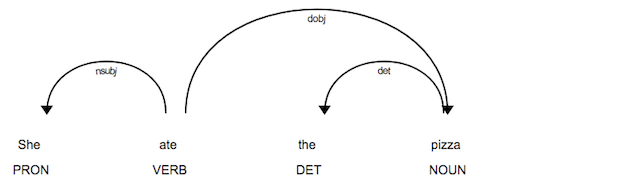

In [14]:
from IPython.display import Image
Image("dep_example.png")

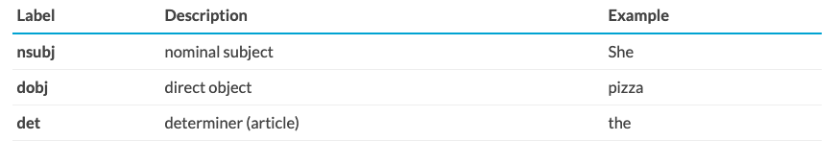

In [15]:
Image("ss1.5.png")

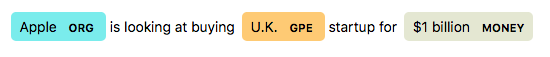

In [16]:
# Predicting Named Entities

Image('ner_example.png')

In [17]:
# Process a text
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_) 

Apple ORG
U.K. GPE
$1 billion MONEY


In [18]:
# Tip: the spacy.explain method

print(spacy.explain("GPE"))
print(spacy.explain("NNP"))
print(spacy.explain("dobj"))

Countries, cities, states
noun, proper singular
direct object


6. Model packages (Quiz)

- What’s not included in a model package that you can load into spaCy?

    - The labelled data that the model was trained on.

That's correct! Statistical models allow you to generalize based on a set of training examples. Once they’re trained, they use binary weights to make predictions. That’s why it’s not necessary to ship them with their training data.

7. Loading models

- Use spacy.load to load the small English model "en_core_web_sm".
- Process the text and print the document text.

In [19]:
import spacy

# Load the "en_core_web_sm" model
# nlp = spacy.load("en_core_web_md")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


8. Predicting linguistic annotations

You’ll now get to try one of spaCy’s pre-trained model packages and see its predictions in action. Feel free to try it out on your own text! To find out what a tag or label means, you can call spacy.explain in the loop. For example: spacy.explain("PROPN") or spacy.explain("GPE").

Part 1

- Process the text with the nlp object and create a doc.

- For each token, print the token text, the token’s .pos_ (part-of-speech tag) and the token’s .dep_ (dependency label).

In [20]:
import spacy

# nlp = spacy.load("en_core_web_md")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ccomp     
official    NOUN      acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


Part 2

- Process the text and create a doc object.
- Iterate over the doc.ents and print the entity text and label_ attribute.

In [21]:
import spacy

# nlp = spacy.load("en_core_web_md")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


In [22]:
# Messing around

doc.ents

(Apple, first, U.S., $1 trillion)

9. Predicting named entities in context

Models are statistical and not always right. Whether their predictions are correct depends on the training data and the text you’re processing. Let’s take a look at an example.

- Process the text with the nlp object.
- Iterate over the entities and print the entity text and label.
- Looks like the model didn’t predict “iPhone X”. Create a span for those tokens manually.

In [23]:
import spacy

# nlp = spacy.load("en_core_web_md")

text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # Print the entity text and label
    print(ent.text, ent.label_)

# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print("Missing entity:", iphone_x.text)

iPhone X PRODUCT
Apple ORG
Missing entity: iPhone X


✔ Perfect! Of course, you don't always have to do this manually. In the
next exercise, you'll learn about spaCy's rule-based matcher, which can help you
find certain words and phrases in text.

10. Rule-based matching

Why not just regular expressions?

- Match on Doc objects, not just strings
- Match on tokens and token attributes
- Use the model's predictions
- Example: "duck" (verb) vs. "duck" (noun)

In [24]:
# Using the Matcher (1)

import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a model and create the nlp object
# nlp = spacy.load("en_core_web_md")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [25]:
# Using the Matcher (2)

# Call the matcher on the doc
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


- match_id: hash value of the pattern name
- start: start index of matched span
- end: end index of matched span

In [26]:
# Messing around

matches

[(9528407286733565721, 1, 3)]

In [27]:
# Matching lexical attributes

pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]

matcher.add("FIFA_PATTERN", None, pattern)
doc = nlp("2018 FIFA World Cup: France won!")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

2018 FIFA World Cup:


In [28]:
# Matching other token attributes

pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

matcher.add("PET_PATTERN", None, pattern)
doc = nlp("I loved dogs but now I love cats more.")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

loved dogs
love cats


In [29]:
# Using operators and quantifiers (1)

pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]

matcher.add("APP_PATTERN", None, pattern)
doc = nlp("I bought a smartphone. Now I'm buying apps.")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

bought a smartphone
buying apps


In [30]:
# These outputs were edited to match the tutorial's outputs

In [31]:
# Using operators and quantifiers (2)

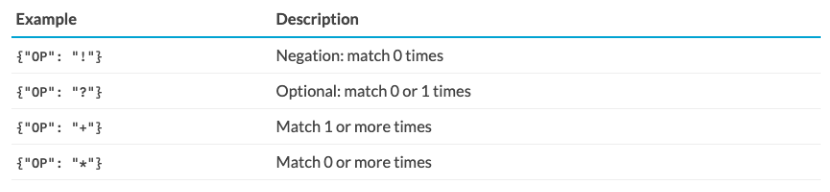

In [32]:
Image('ss1.10.png')

11. Using the matcher

- Import the Matcher from spacy.matcher.
- Initialize it with the nlp object’s shared vocab.
- Create a pattern that matches the "TEXT" values of two tokens: "iPhone" and "X".
- Use the matcher.add method to add the pattern to the matcher.
- Call the matcher on the doc and store the result in the variable matches.
- Iterate over the matches and get the matched span from the start to the end index.

In [33]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# nlp = spacy.load("en_core_web_md")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [
            {'TEXT': 'iPhone'},
            {'TEXT': 'X'}
]

# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", None, pattern)

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


12. Writing match patterns

In this exercise, you’ll practice writing more complex match patterns using different token attributes and operators.

Part 1

- Write one pattern that only matches mentions of the full iOS versions: “iOS 7”, “iOS 11” and “iOS 10”.

In [34]:
import spacy
from spacy.matcher import Matcher

# nlp = spacy.load("en_core_web_md")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


Part 2

- Write one pattern that only matches forms of “download” (tokens with the lemma “download”), followed by a token with the part-of-speech tag "PROPN" (proper noun).

In [35]:
import spacy
from spacy.matcher import Matcher

# nlp = spacy.load("en_core_web_md")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
# pattern = [{"LEMMA": 'download', "POS": "VERB"}, {"POS": 'PROPN'}]
pattern = [{"LEMMA": 'download'}, {"POS": 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


Part 3

- Write one pattern that matches adjectives ("ADJ") followed by one or two "NOUN"s (one noun and one optional noun).

In [36]:
import spacy
from spacy.matcher import Matcher

# nlp = spacy.load("en_core_web_md")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


In [37]:
# Notes:
# What's the "OP" parameter?

# https://spacy.io/usage/rule-based-matching#quantifiers

# Operators and quantifiers
# The matcher also lets you use quantifiers, specified as the 'OP' key. 
# Quantifiers let you define sequences of tokens to be matched, e.g. one 
# or more punctuation marks, or specify optional tokens. Note that there 
# are no nested or scoped quantifiers – instead, you can build those 
# behaviors with on_match callbacks.

# OP  DESCRIPTION
# !   Negate the pattern, by requiring it to match exactly 0 times.
# ?   Make the pattern optional, by allowing it to match 0 or 1 times.
# +   Require the pattern to match 1 or more times.
# *   Allow the pattern to match zero or more times.